# Homework:

Any mass can lead to a gravitational potential in 3-D (x-y-z) space
\begin{equation}
\nabla^2\Phi=4\pi G\rho
\end{equation}
    

We will set G=1 for this problem.  
Please solve the potential of a line mass 
(i.e. one zone at x=50, y=50 with nonzero density and all others with zero density) 
using SOR. Since the problem has symmetry in the Z direction:
\begin{equation}
\nabla^2\Phi=\frac{\partial^2\Phi}{\partial^2 x}+\frac{\partial^2\Phi}{\partial^2y}
\end{equation}


The domain is X from 0 to 100, Y from 0 to 100. $\Delta$x= $\Delta$y=1. (assume $\Phi=0$
at the boundary and $\Phi_{50,50}$ is always 1)

Please verify that the potential has radial dependence close to 2*G*$\mu$*ln(r)+constant. 
Where $\mu$ is its mass per unit length and r is the distance to the line mass. 




## 4 Point Stencil with SOR
We need to keep modfiy our code from class and assign the density of distribution of our masses in a way such that 

$$\rho = 1 @ (x=50,y=50)$$ 

and all other densities are zero, replicating a infinitly long line of mass going through $x=50 and y=50$ along the Z axis

Initializing
0
31.41592653589793
15.315264186250241
14.932382581593984
10.9193047627906
10.646322143720836
8.650136741773178
8.433883323228848
7.195156710129611
7.015277792376371
6.155906262810266
10
6.002008606240009
5.364295191827008
5.230187812031333
4.7351878941069385
4.616808196754265
4.220051242345695
4.114549961287053
3.7888147560184944
3.694094387118032
3.4216549260680766
20
3.3361135529163746
3.104860227089217
3.0272387214119867
2.828576180319325
2.7578617758113415
2.5854954148231326
2.520858029452554
2.370056700904946
2.3108052833823223
2.1779339795878387
30
2.1234856300981426
2.005698536553636
1.955556073139795
1.8505887250962618
1.8043240069688553
1.7103487982725607
1.6675900783157467
1.5831134756642253
1.5435356387726196
1.4673235666082216
40
1.4306404774430161
1.3616631687091565
1.3276215894914276
1.2650121622597295
1.2333868582032361
1.176409747905804
1.1469995042081589
1.0950260891737267
1.0676504369443836
1.0201399925003585
50
0.9946364926878495
0.951121146132756
0.927

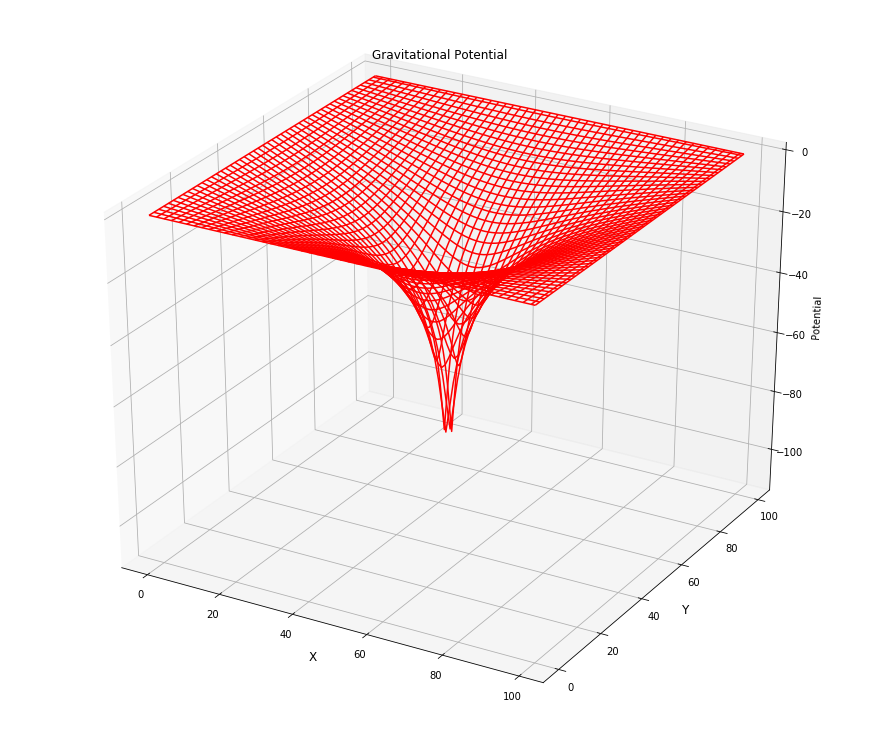

In [30]:
%matplotlib inline
import matplotlib.pylab as p;
from mpl_toolkits.mplot3d import Axes3D
from numpy import *;
import numpy;
print("Initializing")
omega=1.95
h=1
G = 1
Nmax = 100; Niter = 3000 
V = zeros((Nmax, Nmax), float) 
ro = zeros((Nmax, Nmax), float)  
ro[49,49]=10


for iter in range(Niter):                                  
    if iter%10 == 0: print(iter)
    maxerr=0.
    for i in range(1, Nmax-1):
        for j in range(1,Nmax-1): 
            du = 0.25*(V[i+1,j]+V[i-1,j]+V[i,j+1]+V[i,j-1]-(4*pi*h*h*G*ro[i,j]))-V[i,j]
            
            if(maxerr<abs(du)):
                maxerr=abs(du)
            V[i,j] = V[i,j] + omega * du  
    print(maxerr)
    if(maxerr<1.e-3):
        break
            
x = range(0, Nmax, 1)
y = range(0, Nmax, 1)                              
X, Y = p.meshgrid(x,y)                 

def functz(V):           
    z = V[X,Y]                        
    return z
Z = functz(V)                          
print("DONE")          


fig = plt.figure(figsize=(12,10))                                   
ax = Axes3D(fig)                                
ax.plot_wireframe(X, Y, Z, color = 'r')
ax.set_title("Gravitational Potential", fontsize='large')
ax.set_xlabel('X', fontsize='large')                                     
ax.set_ylabel('Y', fontsize='large')
ax.set_zlabel('Potential')
#ax.view_init(elev=5 ,azim=135)
plt.ioff()
plt.show()     

## 9 point stencil with SOR (Optional)

Initializing
0
3.7699111843077517
2.1275291135914642
1.5306580806680612
1.2034313049057277
0.9539852052999672
0.773849224765416
0.6535907274307505
0.5847179000760421
0.526457638959531
0.47239209273088933
10
0.43352924005927973
0.3965193300125826
0.362475156184198
0.33609362992214464
0.3101390565415827
0.2870625823066933
0.26748689001194575
0.24823896533075307
0.2316614922330211
0.21660211409713892
20
0.20181373512987985
0.18943523997052825
0.1775642774806312
0.16602632451877342
0.15642445934330326
0.14690236560707884
0.13797053203288534
0.1301394086138695
0.12240152474442621
0.11536505730158529
30
0.10891792770058105
0.10258000281494717
0.09757741415477472
0.0928066192060144
0.08845158768329175
0.08435110973310556
0.08044931182897239
0.07672866323552996
0.07327080394682964
0.07004267777099416
40
0.0669921994544122
0.06407772060239664
0.06133902582684886
0.0587771533683257
0.05633665770134741
0.05398145358077511
0.051772130228649516
0.049662927933091905
0.04764218464051287
0.04569945191

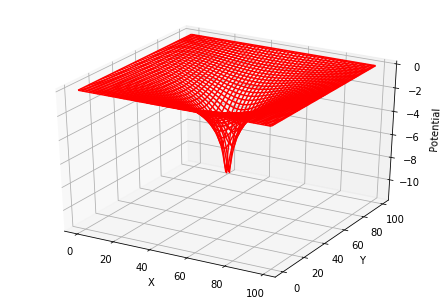

In [31]:

%matplotlib inline
import matplotlib.pylab as p;
from mpl_toolkits.mplot3d import Axes3D
from numpy import *;
import numpy;
print("Initializing")
h=1
G = 1

omega=1.95
Nmax = 100; Niter = 1500; V = zeros((Nmax, Nmax), float)   
ro = zeros((Nmax, Nmax), float)  
ro[49,49]=1





for iter in range(Niter):    
    if iter%10 == 0: print(iter)
    maxerr=0.
    for i in range(1, Nmax-1):                                                
        for j in range(1,Nmax-1): 
            du = 1./20.*(V[i-1,j+1]+V[i+1,j+1]+V[i-1,j-1]+V[i+1,j-1]+4.*(V[i,j+1]+V[i,j-1]+V[i-1,j]+V[i+1,j])-(24*h**2 * pi*G*ro[i,j]))-V[i,j]
            if(maxerr<abs(du)):
                maxerr=abs(du)
                
            V[i,j] = V[i,j] + omega*du 
 
    print(maxerr)
    if(maxerr<1.e-3):
        break  

x = range(0, Nmax, 1)
y = range(0, Nmax, 1)                              
X, Y = p.meshgrid(x,y)                 

def functz(V):                                       
    z = V[X,Y]                        
    return z

Z = functz(V)                          
fig = p.figure()                                      # Create figure
ax = Axes3D(fig)                                      # Plot axes
ax.plot_wireframe(X, Y, Z, color = 'r')               # Red wireframe
ax.set_xlabel('X')                                     
ax.set_ylabel('Y')
ax.set_zlabel('Potential')

p.show()                                              # Show fig

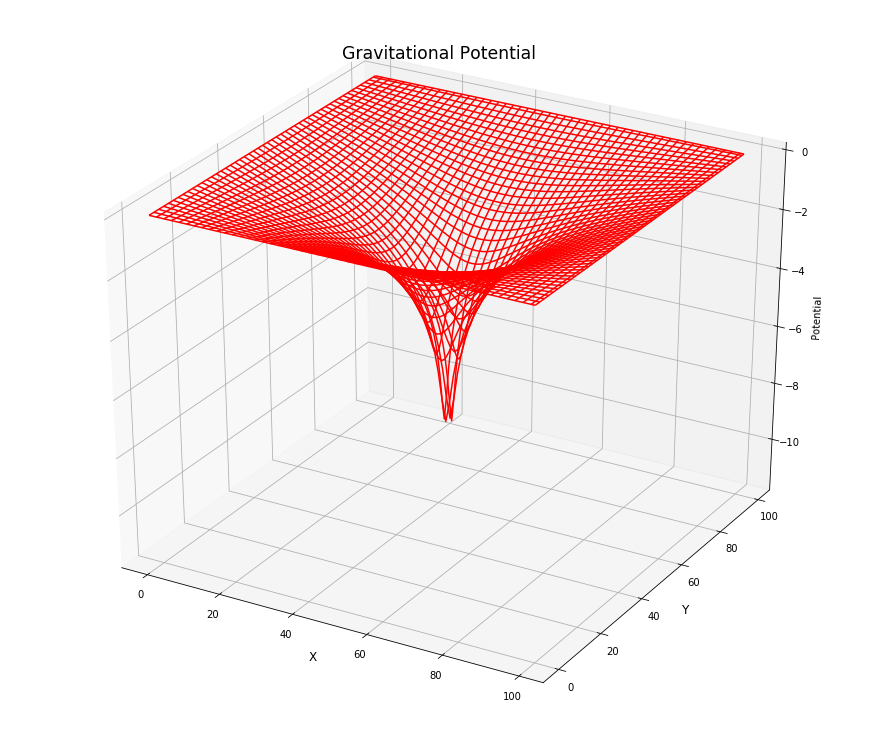

In [32]:
%matplotlib inline


import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(12,10))                             
ax = Axes3D(fig)                                  
ax.plot_wireframe(X, Y, Z, color = 'r')
ax.set_title("Gravitational Potential", fontsize='xx-large')
ax.set_xlabel('X', fontsize='large')                                     
ax.set_ylabel('Y', fontsize='large')
ax.set_zlabel('Potential')
#ax.view_init(elev=5 ,azim=135)
plt.ioff()
plt.show()     


## Radial dependence Verification
If we just graph the function:$$\Phi(r) = 2G\mu ln(r)+constant$$
We see that we get a similiar looking graph compared to our numerical analysis

/Users/farazmost/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


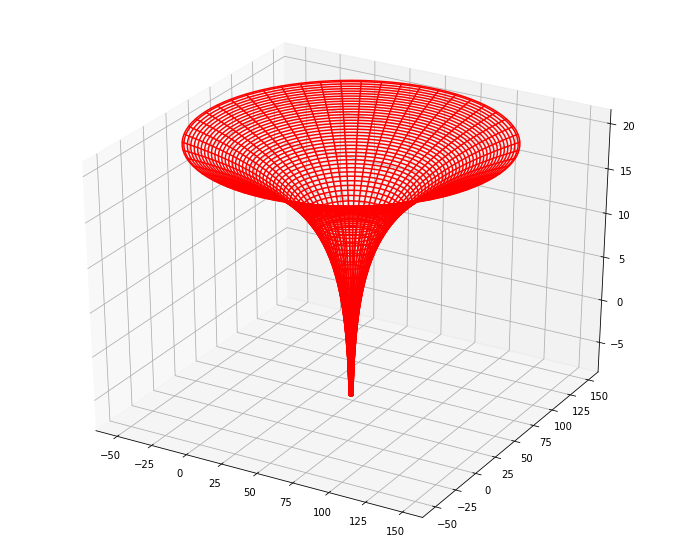

In [33]:

from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')

# Create the mesh in polar coordinates and compute corresponding Z.
r1 = np.linspace(0, Nmax, 100)
p1 = np.linspace(0, 2*np.pi, 100)
R1, P1 = np.meshgrid(r1, p1)
Z1 = 2*G*pi *log(R1) - 8

# Express the mesh in the cartesian system.
X1, Y1 = 49+R1*np.cos(P1), 49+R1*np.sin(P1)

# Plot the surface.
ax.plot_wireframe(X1, Y1, Z1, color = 'r')    
plt.ioff()  

## Analytical vs Numerical analysis
If we take a look at a Cross section of our numerical solution and fixing one of our coordinates such that we can vary the other and still get the unified expression for r such that:

$$ r = \sqrt{(x-49)^2+(y-49)^2}$$

where the origin has been shifted by 49 because $r$ is the distance from the axis of mass as opposed to the origin

In [34]:
Xanalytical = np.linspace(1, 50, 100)
def function (r,c,G):
    return 2*G*np.log(r) + c 
Zanalytical = radial(Xanalytical , -8)

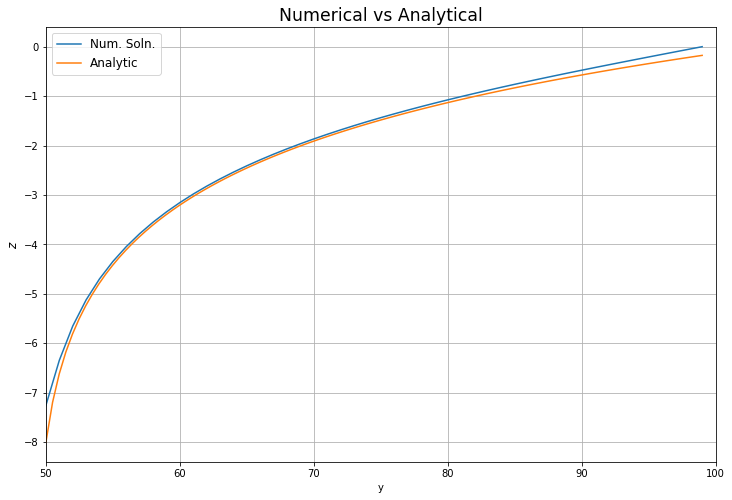

In [35]:
plt.figure(figsize=[12, 8])
plt.title('Numerical vs Analytical', fontsize='xx-large')
plt.xlabel("y")
plt.ylabel('$z$', fontsize='large')
plt.plot(X[50], Z[50,:], label='Num. Soln.')
plt.plot(49+Xanalytical, Zanalytical, label='Analytic')
plt.xlim([50, 100])
plt.legend(loc="best", fontsize='large')
plt.grid()
plt.show()
